In [3]:
import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


hdulist = fits.open('allStar-dr17-synspec_rev1.fits')

#Selecting from HDU

hdu = hdulist[1]
hdu.header

#Getting Effective Temp, Log(g), and Metallicity    
teff = hdu.header['TTYPE129']
teffdata = hdu.data[teff]

logg = hdu.header['TTYPE131']
loggdata = hdu.data[logg]

carbon_abundance = hdu.header['TTYPE142']
nitrogen_abundance = hdu.header['TTYPE153']
cdata = hdu.data[carbon_abundance]
ndata = hdu.data[nitrogen_abundance]


#Reformat for Pandas
teff_1 = teffdata.reshape(733901, 1)
logg_1 = loggdata.reshape(733901, 1)
c_1 = cdata.reshape(733901,1)
n_1 = ndata.reshape(733901,1)

teff_final = np.concatenate(teff_1)
logg_final = np.concatenate(logg_1)
c_final = np.concatenate(c_1)
n_final = np.concatenate(n_1)

df = pd.DataFrame({'teff': teff_final, 'logg': logg_final, 'C_Fe': c_final, 'N_Fe': n_final})

C_N = df.C_Fe - df.N_Fe

df2 = pd.DataFrame({"C_N": C_N})
df4 = pd.concat([df, df2], axis=1, join="inner")
df4

,teff,logg,C_Fe,N_Fe,C_N
0,5694.898438,4.428520,0.004847,0,0.004847
1,3723.911133,0.904598,0.009295,0,0.009295
2,5501.772949,4.304115,0.061738,256,-255.938262
3,6099.780762,3.673970,0.112730,32,-31.887270
4,6162.030273,3.715561,0.032651,288,-287.967349
...,...,...,...,...,...
733896,NaN,NaN,NaN,0,NaN
733897,4859.908691,2.480687,-0.060314,0,-0.060314
733898,4585.409668,2.571437,-0.011308,0,-0.011308
733899,4509.591309,1.334888,-0.616490,288,-288.616490


<IPython.core.display.Javascript object>


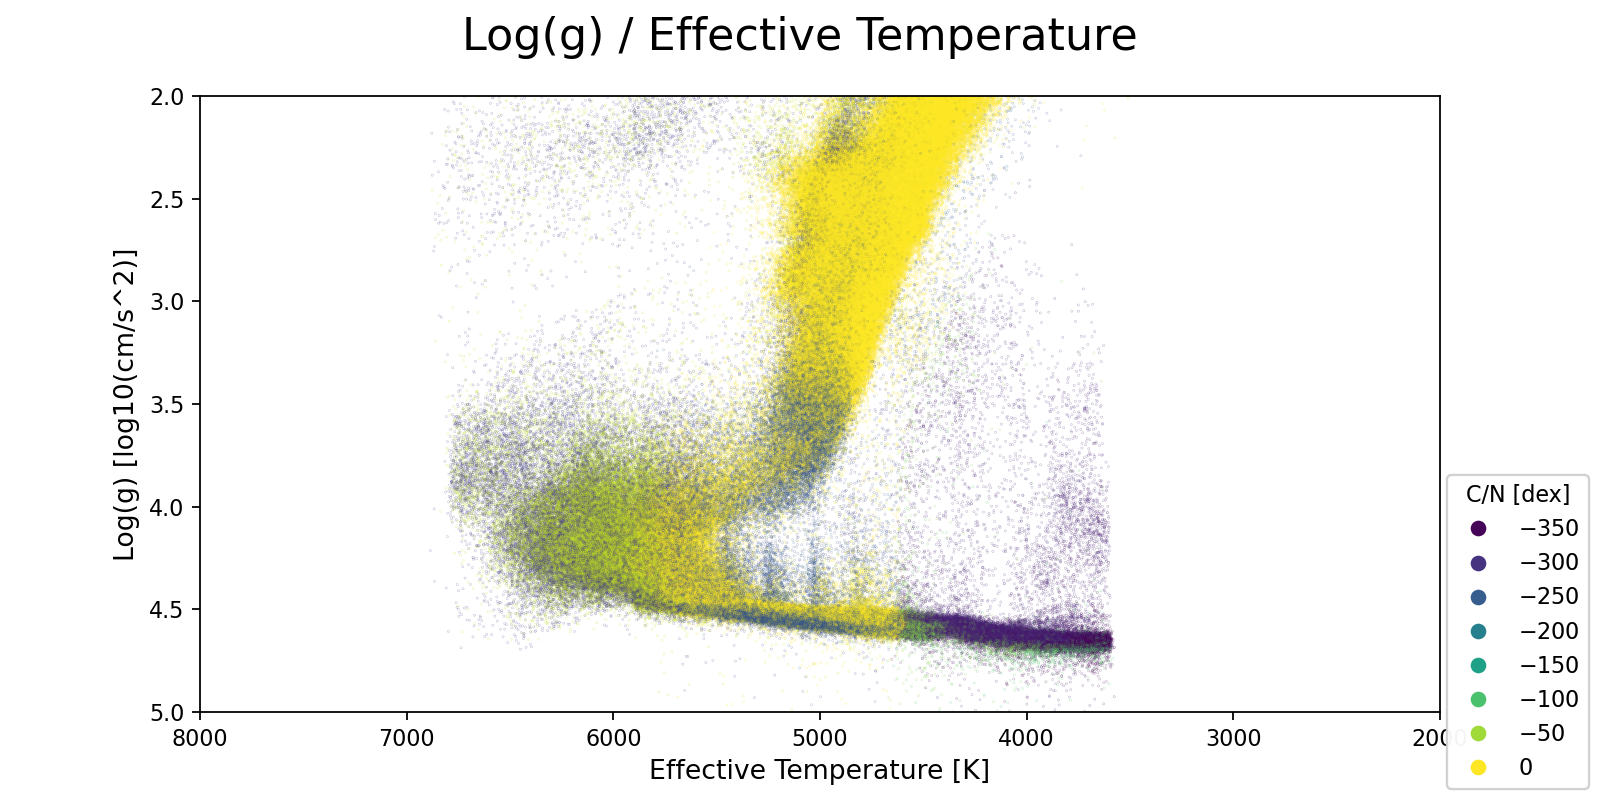

In [10]:
%matplotlib notebook

fig, ax1 = plt.subplots(figsize=(10, 5))
scatter = ax1.scatter(df4.teff, df4.logg, c=df4.C_N, label = 'Teff/Logg', s=.005)
ax1.set_xlim([8000,2000])
ax1.set_ylim([5, 2])
fig.suptitle('Log(g) / Effective Temperature', fontsize=20)
plt.xlabel('Effective Temperature [K]', fontsize=12)
plt.ylabel('Log(g) [log10(cm/s^2)]', fontsize=12)
legend = fig.legend(*scatter.legend_elements(),loc="lower right", title="C/N [dex]")
fig.add_artist(legend)
fig.show()

<IPython.core.display.Javascript object>


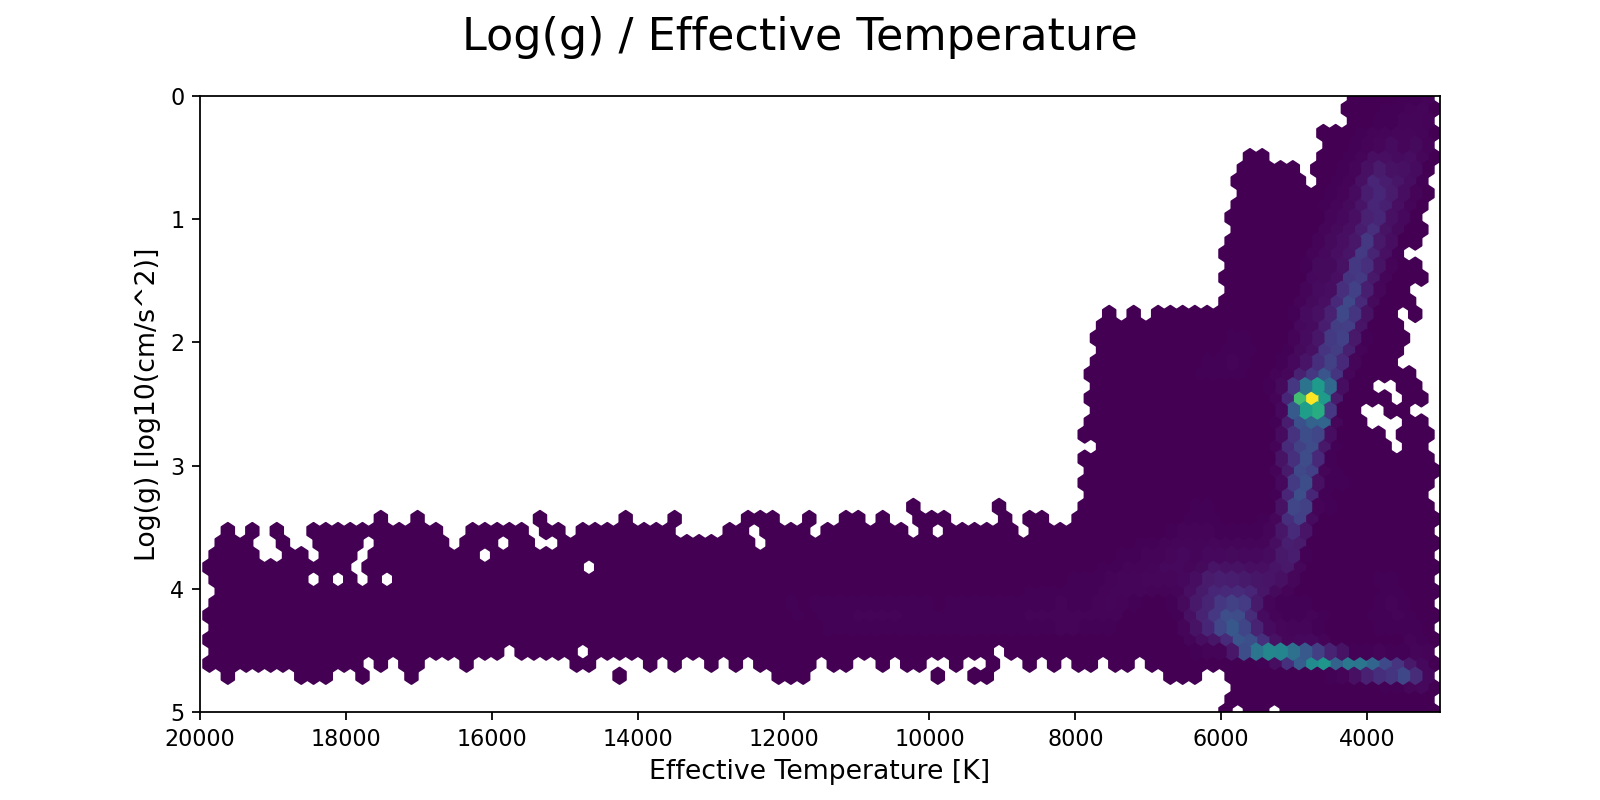

In [6]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10, 5))
scatter = ax.hexbin(df.teff, df.logg, label = 'Teff/Logg', gridsize = (100,30), mincnt=1)
ax.set_xlim([20000,3000])
ax.set_ylim([5, 0])
fig.suptitle('Log(g) / Effective Temperature', fontsize=20)
plt.xlabel('Effective Temperature [K]', fontsize=12)
plt.ylabel('Log(g) [log10(cm/s^2)]', fontsize=12)
fig.show()
